In [100]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
    

In [101]:
data=pd.read_csv("C:/Users/Anupa/Desktop/Learnby- Machine learning & AI/Statistics & Machine Learning_August 2020/PPT & CODE/Linear Regression/Practise Code/Advertising.csv",index_col=0)
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [102]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [103]:
data.tail(10)

,TV,Radio,Newspaper,Sales
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6.0,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42.0,3.6,19.6
195,149.7,35.6,6.0,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [104]:
data.shape

(200, 4)

In [105]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [106]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [108]:
data.isnull().sum()
# No missing values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [109]:
(data.describe())


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [110]:
(data.quantile([0.01,0.99]))


,TV,Radio,Newspaper,Sales
0.01,5.387,0.399,0.999,4.784
0.99,292.907,49.400,89.515,25.507


In [111]:
# There is an  outlier in TV sales towards flooring section & in Newspaper sales in capping section
# WE have to remove these outliers
data["TV"]=np.where(data["TV"]<5.387,data["TV"].quantile(0.01),data["TV"])
data["Newspaper"]=np.where(data["Newspaper"]>89.515,data["Newspaper"].quantile(0.99),data["Newspaper"])

In [112]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.072370,23.264000,30.374650,14.022500
std,85.803993,14.846809,21.198029,5.217457
min,5.387000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,89.515000,27.000000


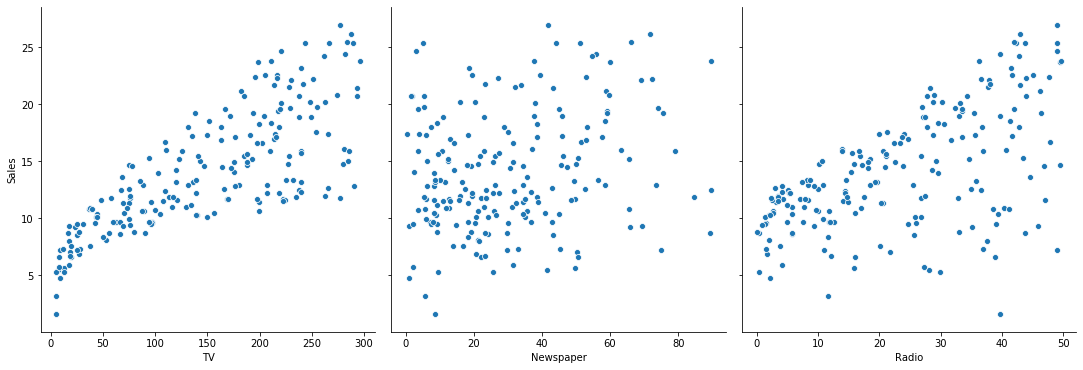

In [113]:
# Visualise the relationship between feature variable & Target variable
# Scatterplot or Pairplot
sns.pairplot(data,x_vars=["TV","Newspaper","Radio"],y_vars="Sales",height=5,kind="scatter")

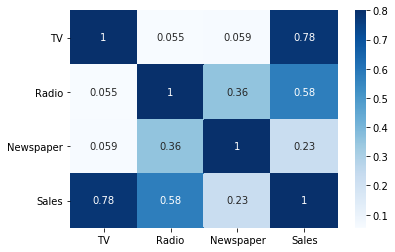

In [114]:
# Heatmap functions
# better understanding of correlated values
corelate=data.corr()
sns.heatmap(corelate,vmax=0.8,cmap="Blues",annot=True)

In [115]:
## Statmodels##
X=data.drop("Sales",axis=1)
Y=data["Sales"]


In [116]:
import statsmodels.api as sm
model=sm.OLS(Y,X)
res=model.fit()

In [117]:
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3556.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                   3.15e-171
Time:                        22:27:32   Log-Likelihood:                         -423.81
No. Observations:                 200   AIC:                                      853.6
Df Residuals:                     197   BIC:                                      863.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0537      0.001     40.265      0.000       0.051       0.056
Radio          0.2215      0.009     23.393      0.000       0.203       0.240
Newspaper      0.0179      0.007      2.603      0.010       0.004       0.031
==============================================================================
Omnibus:                        7.494   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                9.476
Skew:                          -0.268   Prob(JB):                      0.00876
Kurtosis:                       3.922   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()
lm1.params

Intercept    7.030227
TV           0.047543
dtype: float64

In [119]:
XX=data[["TV"]]
XX

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [120]:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression() ## Instentiate
lm1.fit(XX,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
print(lm1.intercept_)
print(lm1.coef_)
print(lm1.score(XX,Y))

7.030226565171992
[0.04754308]
0.6113246949722672


In [122]:
# NOw Lets Assume 2 Features
X2=data[["TV","Radio"]]
lm3=LinearRegression()
lm3.fit(X2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
print(lm3.intercept_)
print(lm3.coef_)
print(lm3.score(X2,Y))

2.9216380074437396
[0.04575187 0.18793096]
0.8964432476494345


In [90]:
### USING SCIKIT-LEARN ###
# Create XX 
XX=data["TV"]

# Instentiate & Fit
from sklearn.linear_model import LinearRegression
lm2=LinearRegression() ## Instentiate
lm2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
print(lm2.fit(X,Y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [92]:
print(lm2.intercept_)
print(lm2.coef_)

2.9378898320835436
[ 0.04576098  0.18840873 -0.00094509]


In [93]:
# Predict For New Observations using Scikit learn
lm2.predict(np.array([[15,15,20]]))

array([6.43153371])

In [96]:
lm2.score(X,Y)

0.8964560986250407